# Neural Networks

Neural networks are machine learning models inspired by the brain, consisting of interconnected nodes (neurons) that process and transmit information. They learn by adjusting the strength of connections between neurons to improve their predictions. [Read more here](https://www.ibm.com/topics/neural-networks).

There are many regression algorithms, for this notebook we will be covering the following:
- **Artificial Neural Network (ANN):** A general term for any neural network, often referring to feedforward networks with input, hidden, and output layers.
- **Deep Neural Network (DNN):** A type of ANN with many hidden layers, enabling it to learn complex, hierarchical representations of data.
- **Convolutional Neural Network (CNN):** A specialised type of DNN designed for processing grid-like data, such as images. It uses convolutional layers to detect local patterns and pooling layers to reduce dimensionality.

# Part 1: Simple ANN with the Iris Dataset
In this section, we go over the basic steps towards making a Artificial Neural Network, using the following basic steps:

1. Importing the Necessary Libraries
2. Loading and Exploring the Dataset
3. Preparing the Data
4. Creating and Training the Model
5. Making Predictions with the Model
6. Evaluating the Model

For the example, we will consider the  [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). The goal of this section is to predict the class of an iris plant given some features using a neural network.

## Step 1: Importing the Necessary Libraries

The main library used is the [PyTorch](https://pytorch.org/), a machine learning framework.

In [2]:
# if you are on google colab, uncomment the line underneath
# !pip install torch torchvision

# machine learning framework with tools for building and training models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations
import numpy as np

# matplotlib is our main data plotting library
import matplotlib.pyplot as plt

# sklearn is go to library for machine learning
from sklearn.model_selection import train_test_split

# later on we will use this to normalise our data
from sklearn.preprocessing import StandardScaler

## Step 2: Loading and Exploring the Dataset

As discussed, we will be using the Iris dataset. The dataset comes with the sklearn library and is essentially data about plants with their species.

In [3]:
from sklearn.datasets import load_iris

# load in the dataset, what type is it?
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# create a pandas dataframe with the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# target is the species of the iris flower, it is what we are trying to predict, it is a number between 0 and 2 where 0 is setosa, 1 is versicolor and 2 is virginica
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


This is a scatter plot of the dataset. Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types.

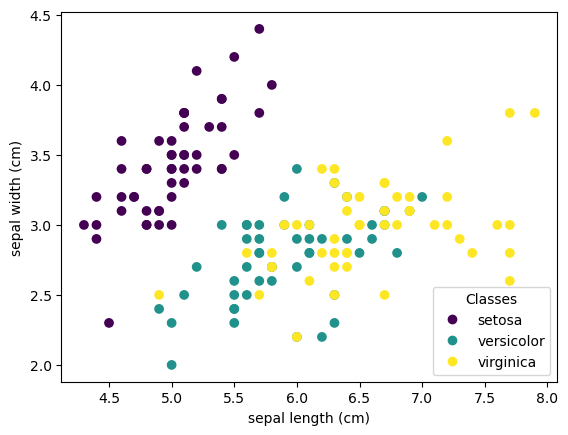

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

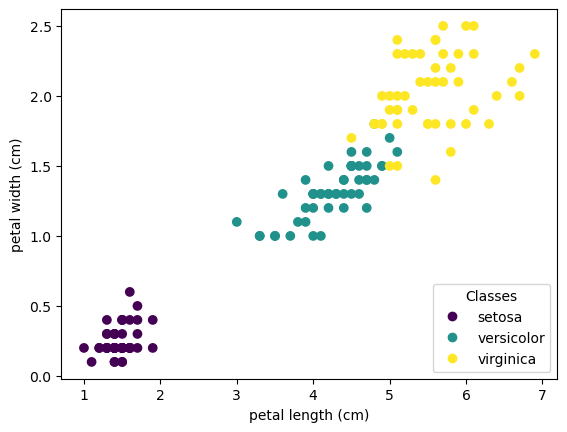

In [8]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

## Discussion

What conclusions can we draw from our scatter graph? What can we expect our relationships to be like?

*hint: take a look at where the clusters of the colours are with respect to the graph. When petal width and length is low, what class does it correlate to?*

In [ ]:
# dimensions of the dataframe; rows, columns
df.shape

(150, 5)

In [ ]:
# info gives us a summary of the data, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## Step 3: Preparing the Data

Preparing the data is a bit more complex than our linear regression. This time, we will split the data as usual into trianing and testing, and we will be:

- Deciding what features to use to train our model
- Converting data to np arrays
- Standardising the data
- Converting data into PyTorch tensors
- Creating Dataloaders out of the tensors 

In [ ]:

# we use all the columns except the target column as our features
X = df.drop('target', axis=1)
# the target column is what we are trying to predict
y = df['target']

# convert the data to numpy arrays
X = np.asarray(X)
y = np.asarray(y)


# we split our data into training and testing data, the test size means we are using 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

standardisation ensures all data contributes equally to the model's learning process by transforming them to have similar scales and distributions.

In [ ]:
# standardise the data, this helps the model learn better
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# convert to PyTorch tensors, tensors are versatile multi-dimensional arrays that efficiently represent data, 
# model parameters, and intermediate results, enabling fast computations on hardware like GPUs.
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# data is loaded into a DataLoader, this is a PyTorch class that loads data in batches
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False)

## Exercise

Research a little about tensors, data loaders and numpy arrays. There are also hyper parameters introduced here, which is batch_size.

## Step 4: Creating and Training the Model

Here is our basic ANN model class, let's break it down line by line.

### Init
- `super(ANNModel, self).__init__()` Initialises the parent class (nn.Module), which provides basic functionality for neural networks
- `self.hidden = nn.Linear(4, 10)` Defines a linear (fully connected) layer named hidden. It takes 4 input features and transforms them into 10 outputs. Think of this as 10 neurons in your hidden layer, each receiving weighted combinations of the 4 inputs
- `self.output = nn.Linear(10, 3)` Defines another linear layer named output. This layer takes the 10 outputs from the hidden layer and transforms them into 3 outputs, representing the three classes you want to predict.

### Forward
- `x = torch.relu(self.hidden(x))` Passes the input data (x) through the hidden layer. The result is then passed through the ReLU activation function (torch.relu). ReLU helps introduce non-linearity into the model, allowing it to learn more complex relationships between the features and the target classes.
- `x = self.output(x)` Passes the activated output from the hidden layer through the output layer. The result is the model's final predictions (logits).

### Loss Function & Optimiser
- `criterion = nn.CrossEntropyLoss()` Defines the loss function (CrossEntropyLoss). This function measures how well the model's predictions match the true labels. You might opt for a different loss function depending on the task, for classification tasks Cross Entropy Loss is appropriate.
- `optimizer = optim.Adam(model.parameters(), lr=0.001)` Creates an Adam optimiser. This optimiser is responsible for updating the model's parameters (weights and biases) during training based on the calculated loss. The learning rate (lr=0.001) controls the magnitude of these updates.

In [ ]:
# create a simple artificial neural network model
class ANNModel(nn.Module):
  def __init__(self):
    super(ANNModel, self).__init__()
    # input layer has 4 nodes (one for each feature)
    # hidden layer has 10 nodes (arbitrary number of nodes, can be changed to any number of nodes)
    # output layer has 3 nodes (one for each class)
    self.hidden = nn.Linear(4, 10)
    self.output = nn.Linear(10, 3)
  
  def forward(self, x):
    # relu is a non-linear activation function, it is used to introduce non-linearity in the model
    x = torch.relu(self.hidden(x))
    x = self.output(x)
    return x

model = ANNModel()

# define the loss function and the optimiser
criterion = nn.CrossEntropyLoss()

# learning rate is how much the model is updated during training, a higher learning rate means the model is updated more, if the learning rate is too high will overshoot the minimum
# a lower learning rate means the model is updated less but with smaller steps, if the learning rate is too low the model may not learn anything
optimizer = optim.Adam(model.parameters(), lr=0.001)


If you want a challenge, try implementing a neural network using **Keras**, which is another machine learning library. Often, the choice of PyTorch and Keras is down to personal preference.

For a model to work correctly, we must train it on some training data, this usually follows these steps:

- Set a number of epochs (iterations)
- for each datapoint in the training dataloader
  - zero the gradienst
  - forward pass
  - calculate the loss
  - backward pass
  - update model parameters

Depending on how much analysis you want to do, you might log some of these loss values to see how the model performs over time.

In [ ]:
# train the model, this is where the model learns the patterns in the training data

# the model is trained for 50 epochs, an epoch is one pass through the entire dataset
num_epochs = 50

for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    # zero the gradients
    optimizer.zero_grad()
    # forward pass
    outputs = model(inputs)
    # calculate the loss
    loss = criterion(outputs, labels)
    # backward pass
    loss.backward()
    # update the model parameters
    optimizer.step()
  
  # print the loss every 10 epochs
  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.1099
Epoch [20/50], Loss: 0.0198
Epoch [30/50], Loss: 0.0010
Epoch [40/50], Loss: 0.0554
Epoch [50/50], Loss: 0.0905


There are additional hyper parameters introduced now, learning rate and epochs. Learning rate is arguably the most important hyper parameter. Try changing the hyper parameters and observe how they affect your loss values!

## Step 5: Making Predictions with the Model

Now we want to use our model on the testing data, to see how well it makes predictions! To do this we carry out the following steps:

- put the model into evaluation mode so it no longer updates the gradient
- looping over the testing data, with arrays to store the metrics
  - forward pass makes predictions, which in this case are probabilities for each class
  - determine the most likely class for each example in the batch (the `_` variable is the maximum probability values themselves and is ignored as we only need the class indices)
  - collect metric into arrays
  - calculate accuracy
- print predictions vs ground truth

In [ ]:
# test the model, this is where we evaluate the model on the test data
model.eval()

# we don't want to update the model parameters during testing
with torch.no_grad():

  # calculate the accuracy of the model
  correct = 0
  total = 0

  all_predictions = []
  all_labels = []

  for inputs, labels in test_loader:
    # forward pass
    outputs = model(inputs)

    # get the predicted class
    _, predicted = torch.max(outputs.data, 1)

    all_predictions.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    # total number of labels
    total += labels.size(0)
    # number of correct predictions
    correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 100.00%


In [ ]:
# print predictions and corresponding labels
for pred, label in zip(all_predictions, all_labels):
  print(f'Predicted: {pred}, Actual: {label}')


## Discssion

Why do you think the data got 100% testing accuracy? What are key characteristics of our dataset? Think about the scatter plot we drew at the start of this section.

# Part 2: Convolutional Neural Network with the CIFAR10 dataset

In this section we will be building a CNN to classify images. We use data preprocessing and the CIFAR-10 dataset. The CIFAR-10 dataset (Krizhevsky, 2008) consists of 60,000 RGB three-channel images with a resolution of 32×32, representing images of 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. The data will be split into training, validation and testing.

As some precursor reading, you can read IBM's blog post [here](https://www.ibm.com/topics/convolutional-neural-networks).

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import random_split
import math

Below is a helper function to prepare the data, this time we use a validation dataset, used to see how well our model is generalising each epoch with the training data. We also parse in a batch_size parameter, determining the number of training samples that are processed before the model's internal parameters are updated. This time we have modularised the code so take a good read of it!

In [ ]:
# prepare CIFAR10 datasets and data loaders
def prepare_data(batch_size=64, val_split=0.2):
  """
  Args:
  batch_size (int): Number of samples per batch.
  val_split (float): Fraction of training data used for validation.

  Returns:
  tuple: Contains train_loader, val_loader, and test_loader.
  """

  # transformations the input data based on Liu's work
  transform = transforms.Compose([
    transforms.ToTensor(),  # convert images to PyTorch tensors

    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalise the pixel value data

    # normalise the pixel value data, based on the mean and standard deviation of the dataset
    transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]], std=[x/255.0 for x in [63.0, 62.1, 66.7]])
  ])

  # loading CIFAR10 training and test datasets
  train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  # generate validation dataset by splitting the training dataset
  num_train = len(train_dataset)
  num_val = int(val_split * num_train)  # flexible percentage of the data for validation
  num_train -= num_val  # remaining data for training

  train_dataset, val_dataset = random_split(train_dataset, [num_train, num_val])

  # create data loaders for training, validation, and testing
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  return train_loader, val_loader, test_loader

batch_size = 64

# splitting the training dataset into training and validation sets
val_split = 0.2
train_loader, val_loader, test_loader = prepare_data(batch_size, val_split)

print("Number of samples in training set:", len(train_loader.dataset))
print("Number of samples in validation set:", len(val_loader.dataset))
print("Number of samples in test set:", len(test_loader.dataset))

Files already downloaded and verified
Files already downloaded and verified
Number of samples in training set: 40000
Number of samples in validation set: 10000
Number of samples in test set: 10000


Here we will use our GPU to speed up training, as it allows for parallel processing and such faster training times, however for this to work you'll need a decently strong GPU!

In [ ]:
# to check if a GPU is available
print(torch.cuda.is_available())

# this line of code checks if a GPU is available, if it is we will use it, if not we will use the CPU, helping the model to train faster
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

False


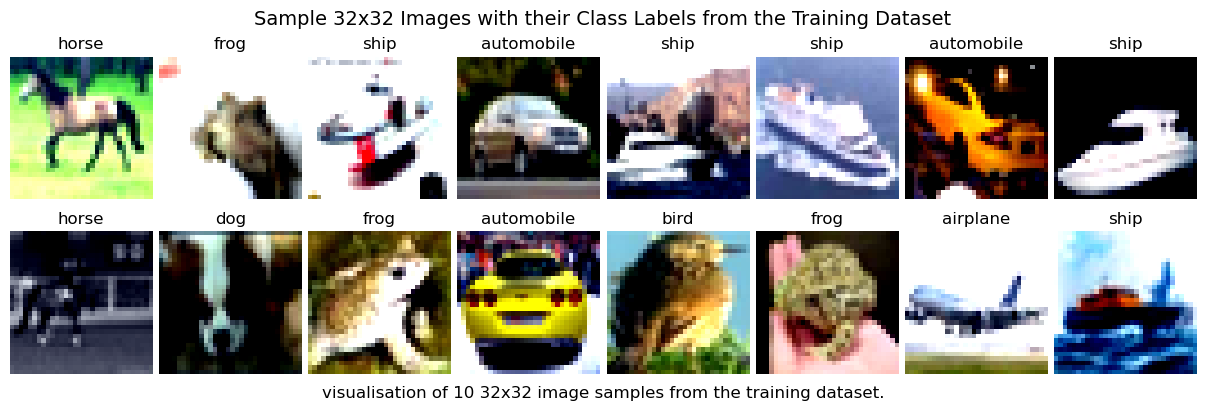

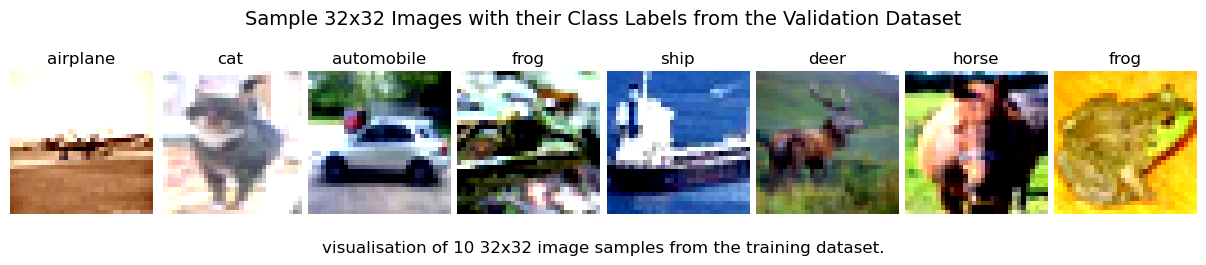

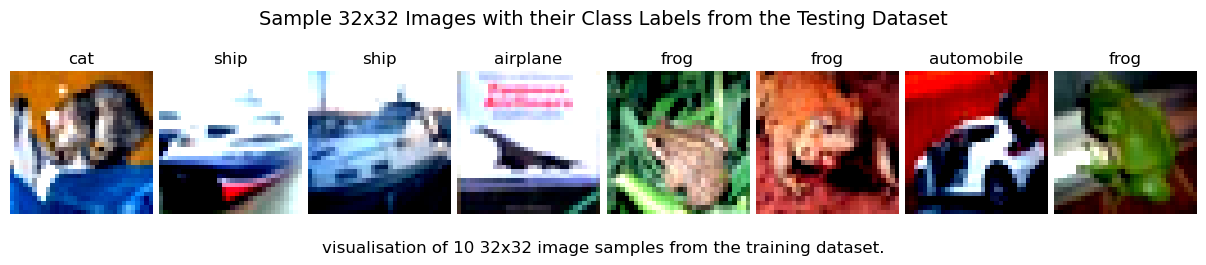

In [ ]:
# visualise the dataset

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def visualise_dataset(data_loader, classes, title='', fig_caption='', num_rows=2, num_cols=8):
  """
  visualises a batch of images from a specified data loader.

  Parameters:
  - data_loader: DataLoader for the dataset to visualise.
  - classes: Tuple of class names corresponding to labels.
  - title: Title for the plot.
  - fig_caption: Caption for the figure.
  - num_rows: Number of rows in the subplot grid.
  - num_cols: Number of columns in the subplot grid.
  """
      
  # fetch a batch of images based on the data loader
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  
  if num_rows > 1:
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4))
  else:
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 2.5))
      
  axes = axes.flatten()  # flatten the 2D array of axes to iterate 

  for idx, (img, label) in enumerate(zip(images, labels)):
    if idx >= num_rows * num_cols:
      break
    label_text = classes[label]  # get the text label for the current image
    imshow(img, label_text, axes[idx])

  plt.subplots_adjust(top=0.85)
  plt.suptitle(title, fontsize=14) 

  # caption figure
  if fig_caption:
    fig.text(0.5, 0.01, fig_caption, ha='center', fontsize=12)

  plt.tight_layout(pad=0.5)
  plt.show()

def imshow(img, label, ax):
  """Helper function to unnormalise and display an image with its label"""
  img = img / 2 + 0.5  # unnormalise
  img = np.clip(img, 0, 1) # clip to be in valid range
  img = np.transpose(img.numpy(), (1, 2, 0))  # convert from Tensor image
  ax.imshow(img)
  ax.set_title(label)
  ax.axis('off')

# visualise training data
visualise_dataset(train_loader,
                  classes,
                  'Sample 32x32 Images with their Class Labels from the Training Dataset',
                  'visualisation of 10 32x32 image samples from the training dataset.',
                  )

# visualise validation data
visualise_dataset(val_loader,
                  classes,
                  'Sample 32x32 Images with their Class Labels from the Validation Dataset',
                  'visualisation of 10 32x32 image samples from the training dataset.',
                  num_rows=1
                  )


# visualise testing data, note that this does not change in every run because shuffle is set to False. 
visualise_dataset(test_loader,
                  classes,
                  'Sample 32x32 Images with their Class Labels from the Testing Dataset',
                  'visualisation of 10 32x32 image samples from the training dataset.',
                  num_rows=1
                  )

Here is our Convolutional Neural Network model class, slightly more complex than our ANN. If you want to understand it better, you could try to draw out what the model architecture looks like on paper!

In [ ]:
# this is a basic convolutional neural network model, used for image classification
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
      
    # Convolutional layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # input channels = 3 (RGB), output channels = 32
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # input channels = 32, output channels = 64
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # input channels = 64, output channels = 128

    # pooling layer
    self.pool = nn.MaxPool2d(2, 2)  # 2x2 Max Pooling

    # fully connected layers
    self.fc1 = nn.Linear(128 * 4 * 4, 512)  # adjust the size according to the output from the last conv layer
    self.fc2 = nn.Linear(512, 10)  # linear layer for 10 output classes

    # ReLU activation function
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(self.relu(x))

    x = self.conv2(x)
    x = self.pool(self.relu(x))

    x = self.conv3(x)
    x = self.pool(self.relu(x))

    # flatten the output for the fully connected layers
    x = x.view(-1, 128 * 4 * 4)
    x = self.relu(self.fc1(x))

    # second fully connected layer
    x = self.fc2(x)  # note: no activation like softmax needed here, it's handled by nn.CrossEntropyLoss

    return x

Once again, we will train our model and then evaluate it. This training loop uses validation data so it's a bit longer in terms of lines of code. However, the logic is similar, we have modularised it to make it easier to reuse, and the metrics are stored and returned so we can analyse them and plot them later.

In [ ]:
def train_model(model, train_loader, val_loader, device, criterion, optimizer, num_epochs=10, verbose=False):
  
  train_losses = []
  val_losses = []
  val_accuracies = []
  train_accuracies = []

  for epoch in range(num_epochs):

    model.train()
    
    batch_losses = []
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:

      # move data to device
      images, labels = images.to(device), labels.to(device)

      # zero gradients
      optimizer.zero_grad()

      # get model output (logits)
      outputs = model(images)

      # calculate loss
      loss = criterion(outputs, labels)

      # compute gradients
      loss.backward()

      # update parameters
      optimizer.step()
      batch_losses.append(loss.item())

      # calculate train accuracy
      _, predicted = torch.max(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    train_loss_avg = np.mean(batch_losses)
    train_losses.append(train_loss_avg)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
                            
    if val_loader is not None:
      model.eval()
      val_batch_losses = []
      correct = 0
      total = 0
      with torch.no_grad():
        for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)

          loss = criterion(outputs, labels)

          val_batch_losses.append(loss.item())


          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    val_loss = np.mean(val_batch_losses)
    val_losses.append(val_loss)
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
      
    if verbose and val_loader:
      print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss_avg:.4f}, Val Loss: {val_loss:.4f}')

  return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
  # set to eval mode to avoid using dropout and collecting batch stats
  model.eval()

  total = 0
  correct = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)

      # get outputs (logits) and predict
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  return accuracy

In [ ]:
# hyperparameters! Make sure to change these to see how they affect the model
num_epochs = 5
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, device, criterion, optimizer, num_epochs=num_epochs, verbose=True)
test_accuracy = evaluate_model(model, test_loader)

avg_train_losses = np.mean(train_losses, axis=0)
avg_val_losses = np.mean(val_losses, axis=0)
avg_train_accuracies= np.mean(train_accuracies, axis=0)
avg_val_accuracies = np.mean(val_accuracies, axis=0)

# print metrics to console
print(f'''LR: {learning_rate} | TRAIN_ACC: {np.mean(avg_train_accuracies):.2f} | VAL_ACC: {np.mean(avg_val_accuracies):.2f}% | TEST_ACC: {test_accuracy:.2f}% | TRAIN_LOSS: {np.mean(avg_train_losses):.2f} | VAL_LOSS: {np.mean(avg_val_losses):.2f}''') 

Epoch 1/5, Train Loss: 1.3823, Val Loss: 1.0521
Epoch 2/5, Train Loss: 0.9413, Val Loss: 0.8459
Epoch 3/5, Train Loss: 0.7395, Val Loss: 0.7689
Epoch 4/5, Train Loss: 0.5979, Val Loss: 0.7360
Epoch 5/5, Train Loss: 0.4695, Val Loss: 0.7463
LR: 0.001 | TRAIN_ACC: 0.71 | VAL_ACC: 0.71% | TEST_ACC: 74.75% | TRAIN_LOSS: 0.83 | VAL_LOSS: 0.83


## Exercise

Mess around with the hyperparameters (learning rate, batch size, optimiser) and see how it affects the loss during training. What other hyperparameters exist? Can you read up on more and try to implement them? What is a learning rate schedulers? When might you use a specific learning rate scheduler?

In [ ]:
# helper function to plot training and validation losses and accuracies
def plot_all_metrics(metric, test_type='Example', caption=None):
  """
  plots training and validation losses and accuracies for multiple metrics.

  Args:
    metric (dict): dictionary containing metrics data with keys as metric names.
    test_type (str): type of test (default is 'Example').
    caption (str, optional): caption for the plot.

  """
  num_plots = len(metric)
  
  # set the number of columns to 3 and calculate the necessary rows
  cols = 3
  rows = math.ceil(num_plots / cols)
  
  fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), sharey=False)
  axes = axes.flatten() if num_plots > 1 else [axes]

  for ax, (key, metrics) in zip(axes, metric.items()):
    train_losses = metrics['avg_train_losses']
    val_losses = metrics['avg_val_losses']
    train_accuracies = metrics['avg_train_accuracies']
    val_accuracies = metrics['avg_val_accuracies']
    epochs = range(1, len(train_losses) + 1)
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')

    # plotting training and validation losses
    ax.plot(epochs, train_losses, label='Train Loss', color='tab:blue', linestyle='-')
    ax.plot(epochs, val_losses, label='Validation Loss', color='tab:red', linestyle='-')
    
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Accuracy (%)')

    # plotting training and validation accuracies
    ax2.plot(epochs, train_accuracies, label='Train Accuracy', color='tab:green', linestyle='-')
    ax2.plot(epochs, val_accuracies, label='Validation Accuracy', color='tab:orange', linestyle='-')

    ax.set_title(f'{test_type}: {key}')
    
    # combine legends from both axes and place them outside the plot area
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.2, 1), fontsize='small')

  # hide any unused subplots
  for i in range(num_plots, rows * cols):
    fig.delaxes(axes[i])

  fig.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout to fit the caption
  fig.suptitle(f'Training and Validation Metrics for Different {test_type}s', y=1.02)
  
  # add the caption if provided
  if caption:
    fig.text(0.5, -0.05, f"{caption}", ha='center', va='center', fontsize=10)
  
  plt.show()

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, title_suffix=None, caption=None):
  """
  plots training and validation losses and accuracies for a single set of metrics.

  Args:
    train_losses (list): list of training losses.
    val_losses (list): list of validation losses.
    train_accuracies (list): list of training accuracies.
    val_accuracies (list): list of validation accuracies.
    title_suffix (str, optional): suffix for the plot title.
    caption (str, optional): caption for the plot.

  """
  epochs = range(1, len(train_losses) + 1)

  fig, ax1 = plt.subplots()

  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')

  # plotting training and validation losses
  ax1.plot(epochs, train_losses, label='Train Loss', color='tab:blue', linestyle='-')
  ax1.plot(epochs, val_losses, label='Validation Loss', color='tab:red', linestyle='-')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  ax2.set_ylabel('Accuracy (%)')

  # plotting training and validation accuracies
  ax2.plot(epochs, train_accuracies, label='Train Accuracy', color='tab:green', linestyle='-')
  ax2.plot(epochs, val_accuracies, label='Validation Accuracy', color='tab:orange', linestyle='-')
  ax2.tick_params(axis='y')

  # combine legends from both axes and place them outside the plot area
  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.2, 1))

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title(f'Training and Validation Metrics for {title_suffix}')
  
  if caption:
    fig.text(0.5, -0.02, f"{caption}", ha='center', va='center', fontsize=10)
  
  plt.show()


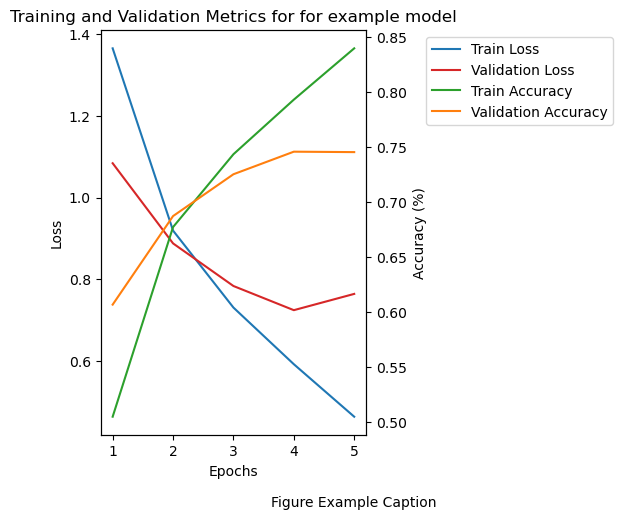

In [ ]:
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, title_suffix="for example model", caption="Figure Example Caption")

# Exercises

I've given two examples of how to use neural networks for prediction tasks with numbers and images. Now I want you to **explore a dataset you are interested in and solve a task using neural networks**. Here are some ideas for those that might not know how to get started:

- Simple sentiment classification model with the IMDb Dataset
- Handwritten Digit Recognition Using the MNIST Dataset
- Named Entity Recognition Using the CoNLL-2003 Dataset
- Machine Translation Using the IWSLT Dataset

Saying so, the best project to go with is the one you will find the most interesting!